In [23]:
#import the required libraries for the task
import pandas as pd
import pycountry_convert as pc
import matplotlib.pyplot as plt

In [24]:
#reading the excel by pandas library
df= pd.read_excel(r'C:\Users\Fatoo\Downloads\indicator hiv estimated prevalence% 15-49.xlsx')


##### QUESTION ONE

In [25]:
#question 1
#this fuction convers a country to a specified continent using the pycountry-convert library
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    
    return country_continent_name



In [26]:
#testing the algorithim with a country
test1=country_to_continent('Italy')
test2=country_to_continent('Egypt')
test3=country_to_continent('Canada')
test4=country_to_continent('China')
print(test1)
print(test2)
print(test3)
print(test4)
#After this tests I can confirm that labling is valid.

Europe
Africa
North America
Asia


In [27]:
#adding a column to the data frame to specify the country continent using the obove tested fuction
df['continent'] = df["Estimated HIV Prevalence% - (Ages 15-49)"].apply(lambda y: country_to_continent(y) )
df

,Estimated HIV Prevalence% - (Ages 15-49),1979,1980,1981,1982,1983,1984,1985,1986,1987,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,continent
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06,Asia
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.06,0.1,0.1,0.1,0.1,0.1,NaN,NaN,NaN,Africa
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oceania
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,Zimbabwe,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.10,19.8,18.4,17.2,16.1,15.1,15.70,15.20,14.90,Africa
214,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.10,Africa
215,Curaçao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America
216,Bonaire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America


In [28]:
#convert the data frame to a csv data as required  in the question
import csv
df.to_csv(r'pandas.csv', header=all, index=None, sep=',')


##### Question 2

In [29]:
#question two
#picking columns from 2000 to 2011 as in the question.
df1=df.iloc[:, 22:]

In [30]:
#adding back country column to our new dataframe
df1.insert(0,'counrty',df['Estimated HIV Prevalence% - (Ages 15-49)'])


In [31]:
#Finding the higest avarage country in each continent
totalavarage=df1.groupby("continent")
maxim=totalavarage.max().mean(axis=1)


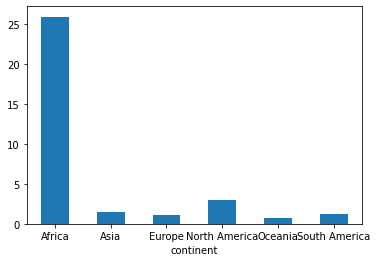

In [32]:
maxim.plot.bar(rot=0)
plt.show()

In [33]:
#Finding the lowest average country in each continent
totalavarage=df1.groupby("continent")
mini=totalavarage.min().mean(axis=1)

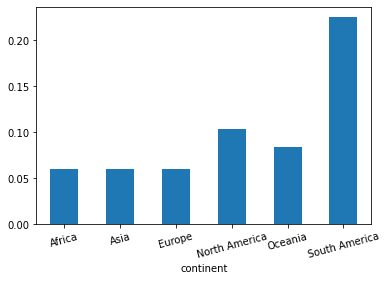

In [34]:
mini.plot.bar(rot=15)
plt.show()

<BarContainer object of 6 artists>

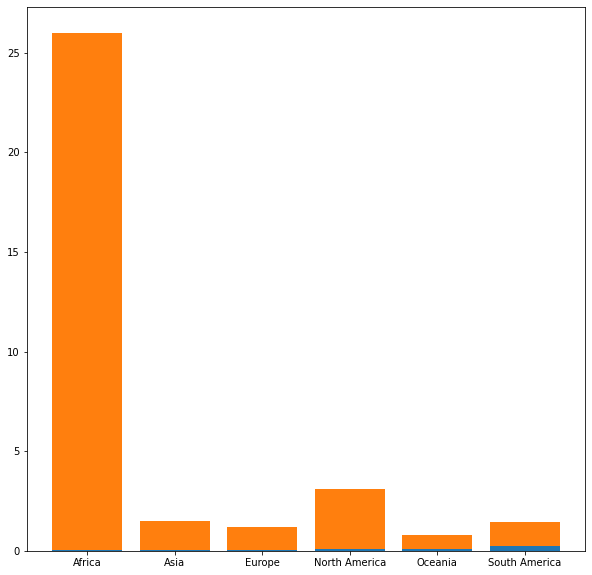

In [35]:
# overlaid bar chart for highest and lowest avarage  
labels = list(mini.index)
mini_avgarage = list(mini)
maxim_avgarage = list(maxim)

fig, ax = plt.subplots(figsize=(10, 10))

ax.bar(labels,mini_avgarage)
ax.bar(labels,
       maxim_avgarage,
       bottom=mini_avgarage)

<BarContainer object of 6 artists>

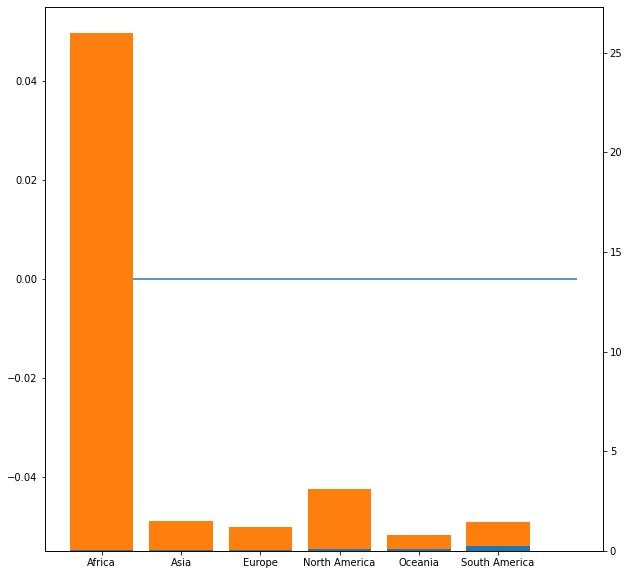

In [36]:
#Select contry not in the highest or the lowest
selected_country = 'Egypt'
country_avgarage =[['country'] ==selected_country]

labels = list(mini.index)
mini_avgarage = list(mini)
maxim_avgarage = list(maxim)

fig, ax1 = plt.subplots(figsize=(10, 10))
ax2 = ax1.twinx()

ax1.hlines(country_avgarage,
           0,
           len(mini_avgarage),
           label={selected_country})

ax2.bar(labels, mini_avgarage)
ax2.bar(labels,
        maxim_avgarage,
        bottom=mini_avgarage)

##### QUESTION THREE

In [37]:
#this will now be used to do the analysis of the hiv prevelence from 1979 to 2011
df5=df.drop(columns='Estimated HIV Prevalence% - (Ages 15-49)')

In [38]:
# calculate the average HIV prevalence for each continent
per_continent_avg_df = df5.groupby('continent').mean(numeric_only=True)

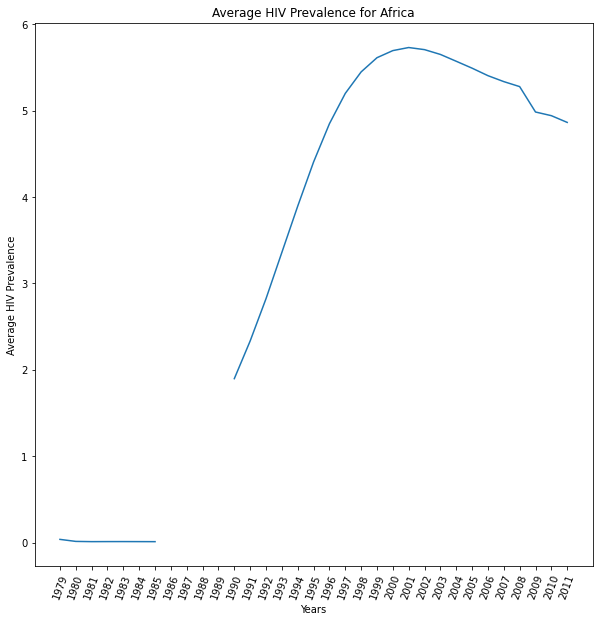

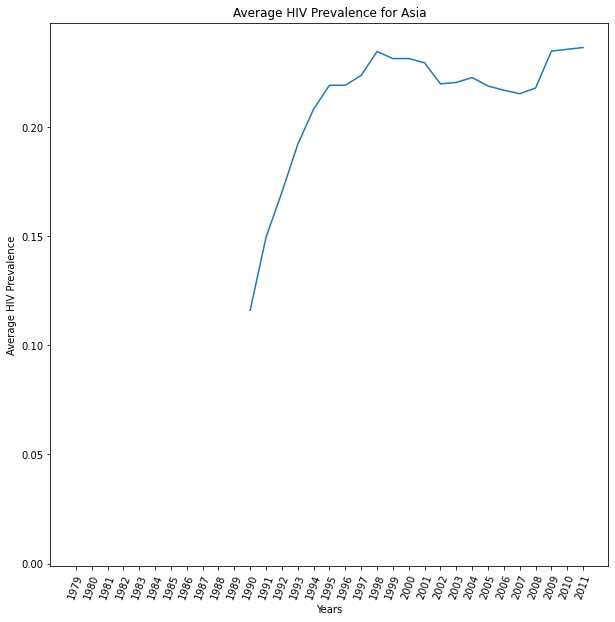

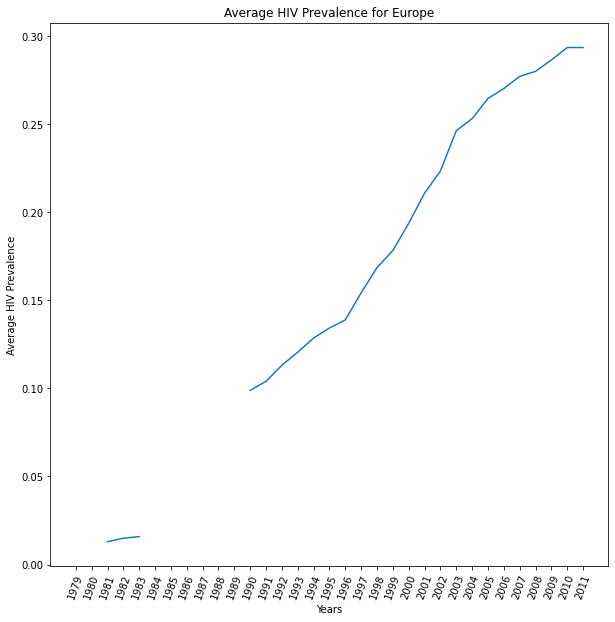

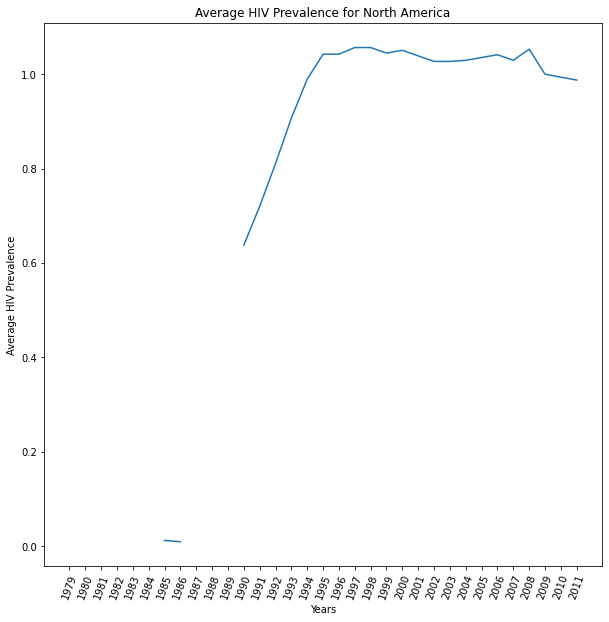

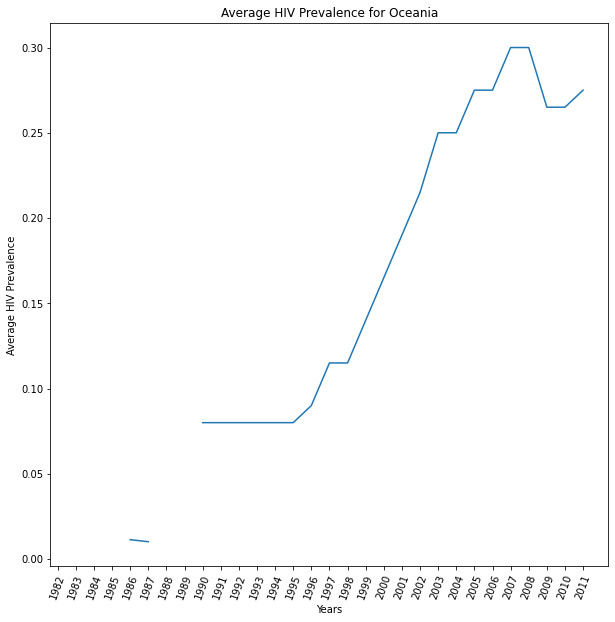

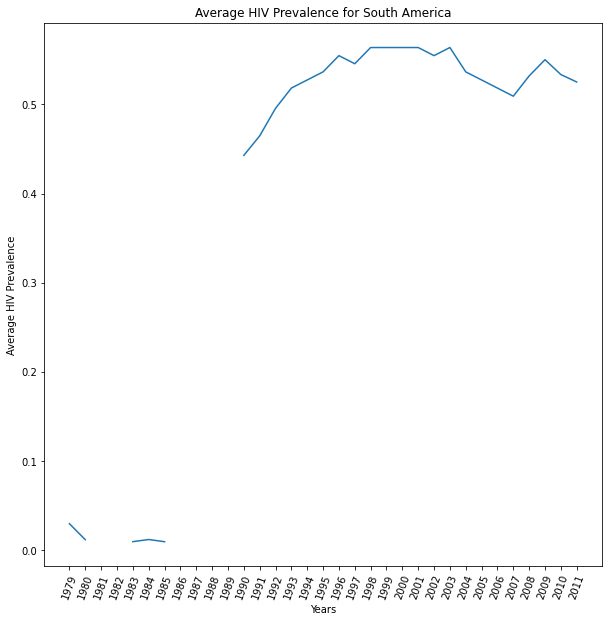

In [39]:
# plot each continent's average 
continents = list(per_continent_avg_df.index)

for continent in continents: 
    fig = plt.figure(figsize=(10, 10))
 
    # number of years
    x = list(per_continent_avg_df.columns)
    # find the average HIV prevalence for the continent
    y = per_continent_avg_df.iloc[continents.index(continent)]

    plt.plot(x, y, label=continent)

    plt.xlabel('Years')
    plt.ylabel('Average HIV Prevalence')
    plt.xticks(rotation=70)
    plt.title(f'Average HIV Prevalence for {continent}')

    plt.savefig(f'./avg_hiv_prevalence_for_{continent}.png')
    plt.show()

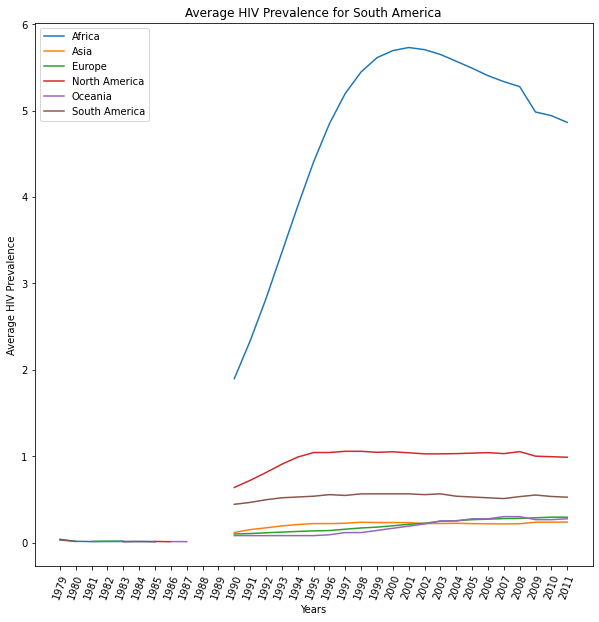

In [40]:
# create an overlayed linechart for all the continents averages
fig, ax = plt.subplots(figsize=(10, 10))

for continent in continents:
    x = list(per_continent_avg_df.columns)
    y = per_continent_avg_df.iloc[continents.index(continent)]

    ax.plot(x, y, label=continent)

ax.set_xlabel('Years')
ax.set_ylabel('Average HIV Prevalence')
ax.set_title(f'Average HIV Prevalence for {continent}')
ax.legend()

plt.xticks(rotation=70)
plt.savefig('./avg_hiv_prevalence_for_all_continents.png')
plt.show()

##### QUESTION FOUR

In [41]:
#add the mean column to our original data frame
df['mean']=df.mean(axis=1)
#x is the prefernce averange of all countries
#pick column 2010 for the y data for the graph
x=df['mean']
y=df['2010']


colors = {'North America':'dodgerblue', 'Europe':'green', 'Asia':'pink', 'Australia':'yellow','Oceania':'purple','South America':'red','Africa':'orange'}

In [42]:
#visualize the data frame to make sure the row is added
df


,Estimated HIV Prevalence% - (Ages 15-49),1979,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,continent,mean
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06,Asia,0.060000
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1,0.1,0.1,0.1,0.1,NaN,NaN,NaN,Africa,0.070526
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oceania,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,Zimbabwe,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.8,18.4,17.2,16.1,15.1,15.70,15.20,14.90,Africa,19.091739
214,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.10,Africa,3.100000
215,Curaçao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America,NaN
216,Bonaire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America,NaN


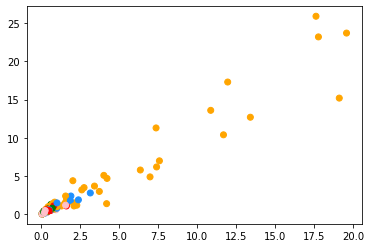

In [43]:
#make a scatter plot
plt.scatter(x,y,c=df['continent'].map(colors))
plt.show()


In [44]:
#pick column 1990 for y data for the next scatter plot
ydata=df[1990]


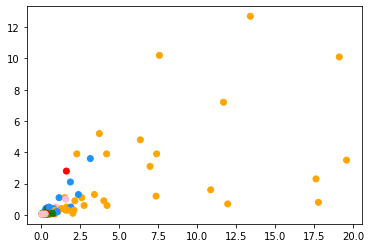

In [45]:
#plot the column data for 1990 against y which was the mean defined obove
plt.scatter(x,ydata,c=df['continent'].map(colors))
plt.show()

the 2010 year prevelence is more positively collinear as compared to 1990  toward the mean
both columns are more concentrated at the around the mean meamning that there was less variance



##### QUESTION FIVE

In [317]:
#Question 5 PDF attached file.